###### Setting the header

In [203]:
# -*- coding: utf-8 -*-
"""
Title: Iris Dataset exploration using Linear Regressio
"""

'\nTitle: Iris Dataset exploration using Linear Regressio\n'

###### Importing necessary libraries

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, scipy, scipy.stats

from matplotlib import style
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

###### Putting Necessary setting and constants

In [205]:
style.use('ggplot')
FILE_NAME = "res/iris.csv"
COLS = ["sepal_width", "sepal_length", "petal_width", "petal_length", "class"]

###### loading the data

In [206]:
data = pd.read_csv(FILE_NAME, header=None, index_col=0, names = COLS )
data.reset_index(inplace=True) ## resetting index for independent index

###### Replacing missing data with outliers

In [207]:
data.fillna(0, inplace=True) ## -99999 failed but we wanted to penalyze

###### converting string label to number label

In [208]:

data.loc[ data['class']=='Iris-setosa', 'class'] = 1
data.loc[ data['class']=='Iris-versicolor', 'class'] = 2
data.loc[ data['class']=='Iris-virginica', 'class'] = 3


###### Exploratory Data Analysis

Means of DataSet
sepal_width     5.843333
sepal_length    3.035333
petal_width     3.718667
petal_length    1.198667
dtype: float64
Medians of dataset
sepal_width     5.8
sepal_length    3.0
petal_width     4.3
petal_length    1.3
dtype: float64


c:\python36-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


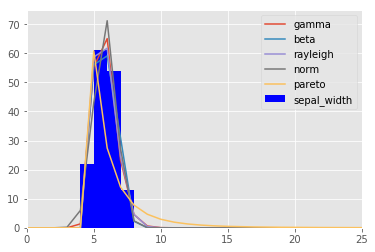

c:\python36-32\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


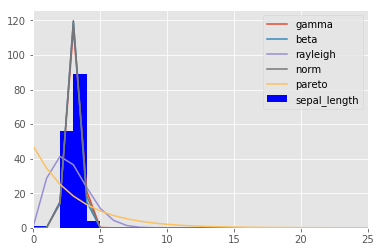

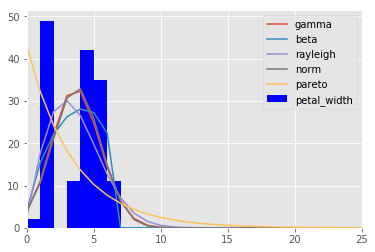

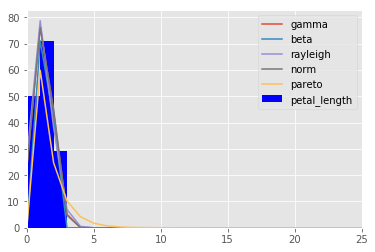

In [209]:
features = data.iloc[:,:-1]

## ------- EDA --------
## Mean
print("Means of DataSet")
dt_mean =  features.apply(np.mean) ## removing last column class and applying np.mean
print(dt_mean)

## Medians
print("Medians of dataset")
dt_median =  features.apply(np.median) ## removing last column class and applying np.mean
print(dt_median)



def dist_fit_test(df,label):
    size = df.shape[0]
    x = scipy.arange(size)
    y = df#scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
    plt.hist(y, bins=range(25), color='b', label=c)

    dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
        plt.plot(pdf_fitted, label=dist_name)
        plt.xlim(0,25)
    plt.legend(loc='upper right')
    plt.show()

for c in features:
    dist_fit_test(features[c],c)
    


###### Co-variance matrix for understanding the data - how spreading the data is against each other

In [224]:
def covarience_matrix(X):
    #standardizing data
    X_std = StandardScaler().fit_transform(X)

    #sample means of feature columns' of dataset
    mean_vec = np.mean(X_std, axis=0) 
    #covariance matrix
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    #if right handside is ( Xstd - mean(Xstd) )^T . ( Xstd - mean(Xstd) )
    #simplyfying X^T.X / ( n - 1 )
    cov_mat = np.cov(X_std.T)
    return cov_mat


print("Covariance Matrix =")
print("%s" % covarience_matrix(data.iloc[:,:-1]))

a = np.array(covarience_matrix(data.iloc[:,:-1]))

##removing the 1s or vairance and keeping only the co-variance
a[a>=1] = 0 
maxcor = np.argwhere(a.max() == a)[0]
mincor = np.argwhere(a.min() == a)[0]

print("Max Related-> %s vs %s" % (COLS[maxcor[0]],COLS[maxcor[1]]))
print("Min Related-> %s vs %s" % (COLS[mincor[0]],COLS[mincor[1]]))


Covariance Matrix =
[[ 1.00746269 -0.16140766  0.83690397  0.82220563]
 [-0.16140766  1.00746269 -0.41872839 -0.35699774]
 [ 0.83690397 -0.41872839  1.00746269  0.94517382]
 [ 0.82220563 -0.35699774  0.94517382  1.00746269]]
Max Related-> petal_width vs petal_length
Min Related-> sepal_length vs petal_width


###### Comment: All distribution seems to have Normal Distribution

###### Shuffling Data to create random situation

In [211]:
data = shuffle(data)

###### gathering sample and training set by separating randomm sample

In [212]:
percent = 10
sample_size = int(data.shape[0]*(percent/100))
sample = data.sample(sample_size)
data.drop(sample.index,inplace=True)

###### data for prediction

In [213]:
XP = np.array(sample.drop(['class'],1))
XP = preprocessing.scale(XP)
yP = np.array(sample['class'])

###### data for training and test

In [214]:
X = np.array(data.drop(['class'],1))
X = preprocessing.scale(X)
y = np.array(data['class'])

###### Spiliting the train and test set by 80%,20%

In [215]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

###### Using Linear Rregression model to fit and train the data

In [216]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Geting the accuracy score of training

In [217]:
accuracy = clf.score(X_test, y_test) #test
print("Test Score %s" %accuracy)

predict = clf.predict(XP)

print("Comparing the predicted and actual label")
print(yP,np.round( np.array(predict)))

Test Score 0.5733931578895513
Comparing the predicted and actual label
[2 1 2 2 2 2 2 3 3 1 2 1 1 1 3] [1. 1. 2. 2. 3. 2. 2. 3. 3. 1. 2. 1. 1. 1. 3.]


###### Getting the accuracy of prediction

In [218]:
ps = ( sum( yP==np.round( np.array(predict) ) ) / len(yP) )
print("Prediction score %s" %ps)

Prediction score 0.8666666666666667


###### Running the process 'Test_N' times for getting average scores

In [219]:
Test_N = 20
accur = []
pred = []

###### Repating the loading, train , test, prediction process 'Test_N' times to get an average result
for c in range(Test_N):
    ## loading the data
    data = pd.read_csv(FILE_NAME, header=None, index_col=0, names = ["sepal_width", "sepal_length", "petal_width", "petal_length", "class"] )

    ## dealing with missing data
    ## replacing with outliers in not available values
    data.fillna(0, inplace=True) #-99999

    data.reset_index(inplace=True)

    ## converting label to number
    data.loc[ data['class']=='Iris-setosa', 'class'] = 1
    data.loc[ data['class']=='Iris-versicolor', 'class'] = 2
    data.loc[ data['class']=='Iris-virginica', 'class'] = 3
    
    ###### Shuffling Data to create random situation
    data = shuffle(data)
    
    #gathering sample and training set
    percent = 10
    sample_size = int(data.shape[0]*(percent/100))
    sample = data.sample(sample_size)

    data.drop(sample.index,inplace=True)

    #data for prediction
    XP = np.array(sample.drop(['class'],1))
    XP = preprocessing.scale(XP)
    yP = np.array(sample['class'])
    
    # data for training and test
    X = np.array(data.drop(['class'],1))
    X = preprocessing.scale(X)
    y = np.array(data['class'])

    # Spiliting the train and test set by 80%,20%
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

    #Using Linear Rregression model to fit and train the data
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    
    # Geting the accuracy score of training
    accuracy = clf.score(X_test, y_test) #test
    print("Test Score %s" %accuracy)

    predict = clf.predict(XP)
    
    print("Comparing the predicted and actual label")
    print(yP,np.round( np.array(predict)))
    
    # Getting the accuracy of prediction
    ps = ( sum( yP==np.round( np.array(predict) ) ) / len(yP) )
    print("Prediction score %s" %ps)
    
    # Saving the scores in lists
    accur.append(accuracy)
    pred.append(ps)

Test Score 0.9031739945734756
Comparing the predicted and actual label
[3 1 2 3 1 3 2 3 3 1 1 1 3 2 1] [3. 1. 2. 3. 1. 3. 2. 3. 3. 1. 1. 1. 3. 2. 1.]
Prediction score 1.0
Test Score 0.7261226730891759
Comparing the predicted and actual label
[2 3 1 0 1 2 3 1 2 2 1 2 3 3 3] [2. 3. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 3. 3. 3.]
Prediction score 0.8666666666666667
Test Score 0.923484141320339
Comparing the predicted and actual label
[3 2 1 2 1 3 1 3 3 1 1 2 1 1 2] [3. 2. 1. 2. 1. 3. 1. 3. 3. 1. 1. 2. 1. 1. 2.]
Prediction score 1.0
Test Score 0.869091785917816
Comparing the predicted and actual label
[1 3 1 0 2 2 2 3 1 2 2 1 2 2 3] [1. 3. 1. 1. 2. 2. 2. 3. 1. 2. 2. 1. 2. 2. 3.]
Prediction score 0.9333333333333333
Test Score 0.7941040758326042
Comparing the predicted and actual label
[2 3 1 1 3 2 3 1 1 1 3 3 2 2 2] [2. 3. 1. 1. 3. 2. 3. 1. 1. 1. 3. 3. 2. 2. 2.]
Prediction score 1.0
Test Score 0.5158110486209352
Comparing the predicted and actual label
[3 1 1 3 1 1 3 1 1 3 2 1 1 2 3] [3. 1. 1. 3. 1

In [220]:
print("Total Session = %s" % Test_N)
print("Average Accuracy %s" % ( sum(accur)/len(accur) ) )
print("Average Prediction Score %s" % ( sum(pred)/len(pred) ) )

Total Session = 20
Average Accuracy 0.8258231413627829
Average Prediction Score 0.8533333333333335
